In [9]:
import pandas as pd
import json
from io import BytesIO
import numpy as np
from pathlib import Path


In [61]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [15]:
data = None
with open("annual-number-of-deaths-by-country-and-year.json", "r") as f:
    data = json.load(f)
    years = list(data.keys())
    #df = pd.json_normalize(data)
    df = pd.io.json.json_normalize(data,[years])
# data
df


C:\Users\wuchi\AppData\Local\Temp\ipykernel_1728\2562235257.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = pd.io.json.json_normalize(data,[years])


KeyError: '2008'

In [4]:
json = pd.read_json("annual-number-of-deaths-by-country-and-year.json")
json.transpose()

,Afghanistan,Africa,African Region,African Union,Albania,Algeria,America,American Samoa,Andean Latin America,Andorra,...,Guadeloupe,Martinique,Zaire,New Caledonia,Wallis and Futuna,French Polynesia,Macau,French Guiana,International,Serbia-Montenegro
2007,"{'Code': 'AFG', 'Executions': 15.0, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2008,"{'Code': 'AFG', 'Executions': 17.0, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2009,"{'Code': 'AFG', 'Executions': 0.0, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2011,"{'Code': 'AFG', 'Executions': 2.0, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2012,"{'Code': 'AFG', 'Executions': 14.0, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2013,"{'Code': 'AFG', 'Executions': 2.0, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': 'DZA', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ASM', 'Executions': None, 'Meningiti...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'AND', 'Executions': None, 'Meningiti...",...,None,None,None,None,None,None,None,None,None,None
2014,"{'Code': 'AFG', 'Executions': 6.0, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': None, 'Executions': None, 'Meningitis...","{'Code': 'ALB', 'Executions': None, 'Meningiti...","{'Code': '

In [21]:
data = pd.read_csv('dada/big_dataset.csv/part-00000-84a6392c-3347-4cac-9aa4-f5d3218763a9-c000.csv',sep=';')
data

,location,Code,Year,Executions,Meningitis,Alzheimer,Parkinson,Nutritional_deficiencies,Malaria,Drowning,...,Poisonings,Protein-energy_malnutrition,Terrorism,Road_injuries,Chronic_respiratory,Cirrhosis_and_other_chronic liver,Digestive,Fire_heat_and_hot_substances,Acute_hepatitis,covid_death
0,Afghanistan,AFG,2007,15.0,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,513.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,NaN
1,Afghanistan,AFG,2008,17.0,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,NaN
2,Afghanistan,AFG,2009,0.0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,NaN
3,Afghanistan,AFG,2011,2.0,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,NaN
4,Afghanistan,AFG,2012,14.0,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8285,Zimbabwe,ZWE,2015,NaN,1439.0,754.0,215.0,3019.0,2518.0,770.0,...,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0,NaN
8286,Zimbabwe,ZWE,2016,NaN,1457.0,767.0,219.0,3056.0,2050.0,801.0,...,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0,NaN
8287,Zimbabwe,ZWE,2017,NaN,1460.0,781.0,223.0,2990.0,2116.0,818.0,...,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,NaN
8288,Zimbabwe,ZWE,2018,NaN,1450.0,795.0,227.0,2918.0,2088.0,825.0,...,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0,NaN


In [48]:
df = data.drop(columns=[ 'location','Code'])
keys = list(df.columns)
keys

['Year',
 'Executions',
 'Meningitis',
 'Alzheimer',
 'Parkinson',
 'Nutritional_deficiencies',
 'Malaria',
 'Drowning',
 'Interpersonal_violence',
 'Maternal_disorders',
 'HIV/AIDS',
 'Drug_use_disorders',
 'Tuberculosis',
 'Cardiovascular_diseases',
 'Lower_respiratory_infections',
 'Neonatal_disorders',
 'Alcohol_use_disorders',
 'Self-harm',
 'Exposure_to_forces_of_nature',
 'Diarrheal',
 'Environmental_heat_and_cold_exposure',
 'Neoplasms',
 'Conflict_and_terrorism',
 'Diabetes_mellitus',
 'Chronic_kidney',
 'Poisonings',
 'Protein-energy_malnutrition',
 'Terrorism',
 'Road_injuries',
 'Chronic_respiratory',
 'Cirrhosis_and_other_chronic liver',
 'Digestive',
 'Fire_heat_and_hot_substances',
 'Acute_hepatitis',
 'covid_death']

In [54]:
df2 = df.groupby('Year').sum(keys)
df2

,Executions,Meningitis,Alzheimer,Parkinson,Nutritional_deficiencies,Malaria,Drowning,Interpersonal_violence,Maternal_disorders,HIV/AIDS,...,Poisonings,Protein-energy_malnutrition,Terrorism,Road_injuries,Chronic_respiratory,Cirrhosis_and_other_chronic liver,Digestive,Fire_heat_and_hot_substances,Acute_hepatitis,covid_death
Year,,,,,,,,,,,,,,,,,,,,,
1990,0.0,4551285.0,6055848.0,1579526.0,7935145.0,9220541.0,4667950.0,3833490.0,3152889.0,3772828.0,...,894643.0,6858130.0,21444.0,11391085.0,32095640.0,10550417.0,19471946.0,1270613.0,1715367.0,0.0
1991,0.0,4517487.0,6299859.0,1618892.0,7648791.0,9429884.0,4607627.0,3941313.0,3112376.0,4824360.0,...,892857.0,6599534.0,25287.0,11436279.0,32672971.0,10700346.0,19715798.0,1279357.0,1706811.0,0.0
1992,0.0,4497463.0,6545681.0,1660750.0,7351626.0,9420684.0,4532392.0,4176074.0,3123980.0,6036719.0,...,898568.0,6339588.0,29226.0,11518380.0,33282644.0,10864870.0,19987698.0,1289320.0,1691895.0,0.0
1993,0.0,4439690.0,6802176.0,1716805.0,7073968.0,9493508.0,4514571.0,4427611.0,3060804.0,7416879.0,...,913597.0,6109063.0,0.0,11624692.0,33883602.0,11118617.0,20357907.0,1313552.0,1674351.0,0.0
1994,0.0,4366104.0,7046782.0,1759833.0,6818224.0,9430740.0,4491935.0,4520829.0,3054855.0,8925112.0,...,921837.0,5902338.0,23070.0,11783861.0,34195791.0,11340206.0,20649676.0,1334662.0,1650022.0,0.0
1995,0.0,4326463.0,7292320.0,1808126.0,7442147.0,9510929.0,4428839.0,4536184.0,3025341.0,10470209.0,...,915699.0,6567239.0,18309.0,11871560.0,34370820.0,11495810.0,20827171.0,1322541.0,1628247.0,0.0
1996,0.0,4424276.0,7527115.0,1861134.0,6941096.0,9625785.0,4285926.0,4417812.0,2997579.0,11856668.0,...,900523.0,6107840.0,20898.0,11867381.0,34698435.0,11611319.0,20955413.0,1304969.0,1590263.0,0.0
1997,0.0,4243501.0,7747961.0,1920630.0,6686370.0,9856834.0,4191785.0,4369348.0,3020979.0,13136697.0,...,886277.0,5883357.0,32772.0,11956743.0,35155885.0,11764661.0,21180049.0,1300342.0,1577178.0,0.0
1998,0.0,4168342.0,7975830.0,1982192.0,6399095.0,9951034.0,4131634.0,4419342.0,3022910.0,14623400.0,...,879536.0,5643450.0,14064.0,12045239.0,35385379.0,11898904.0,21359222.0,1286375.0,1555192.0,0.0


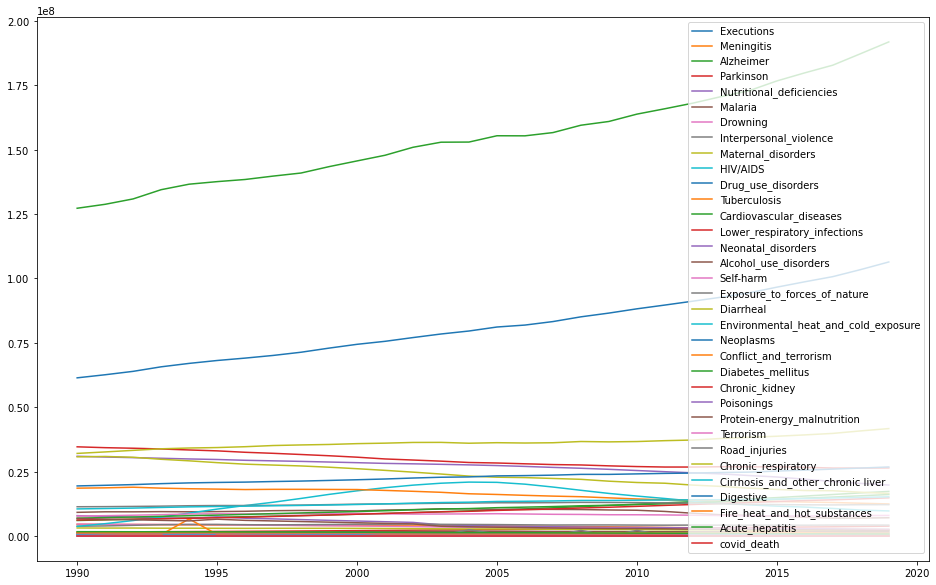

In [113]:
data=df2.copy()
# data=data.set_index('Year')
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)

cause = keys[:]
cause.remove('Year')
cause
for c in cause:
    plt.plot(data.index,data[c].values)

plt.legend(cause)
plt.show()


In [115]:
train=data.loc[:'2017',:]
test=data.loc['2018':,:]
print(sm.tsa.stattools.adfuller(train['Alzheimer']))

(2.1061737770325544, 0.9987959833281927, 1, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 403.61743638369705)


In [116]:
acorr_ljungbox(train['Alzheimer'].values, lags = [6, 12],boxpierce=True,return_df =True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
6,82.730543,9.739187e-16,69.828794,4.433163e-13
12,88.428175,9.941932e-14,73.565136,6.855057e-11


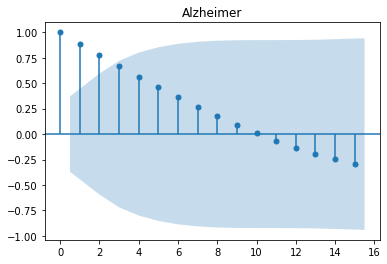

In [117]:
acf=plot_acf(train['Alzheimer'])
plt.title("Alzheimer")
plt.show()

In [155]:
# train
model = sm.tsa.arima.ARIMA(train['Alzheimer'].values,order=(3,2,2))
model_fit=model.fit()
model_fit.summary()

# model = ARIMA(df.value, order=(1,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

# model_fit = model.fit(disp=0)
# print(model_fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -298.102
Date:                Fri, 22 Jul 2022   AIC                            608.205
Time:                        01:02:47   BIC                            615.753
Sample:                             0   HQIC                           610.379
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0853     21.617     -0.004      0.997     -42.454      42.284
ar.L2         -0.0209      3.748     -0.006      0.996      -7.367       7.325
ar.L3          0.0024      0.034      0.071      0.943      -0.064       0.069
ma.L1          0.0861     21.588      0.004      0.997     -42.225      42.397
ma.L2          0.0219      3.727      0.006      0.995      -7.284       7.328
sigma2      3.869e+08   6.94e-06   5.57e+13      0.000    3.87e+08    3.87e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.43   Prob(JB):                         0.50
Heteroskedasticity (H):               4.60   Skew:                             0.51
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.45e+29. Standard errors may be unstable.
"""

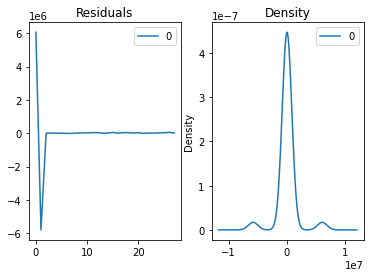

In [156]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

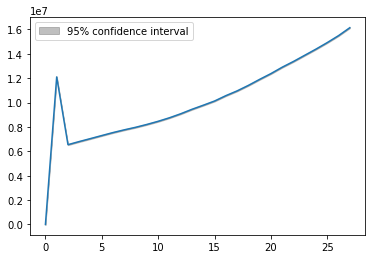

In [159]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,dynamic=False)
plt.show()

In [160]:
ax

array([<AxesSubplot:title={'center':'Residuals'}>,
       <AxesSubplot:title={'center':'Density'}, ylabel='Density'>],
      dtype=object)